# Regular Expression

Regular expressions (called REs, or regexes, or regex patterns) are essentially a tiny, highly specialized programming language embedded inside Python and made available through the re module.

# Regular Expression Cheat Code

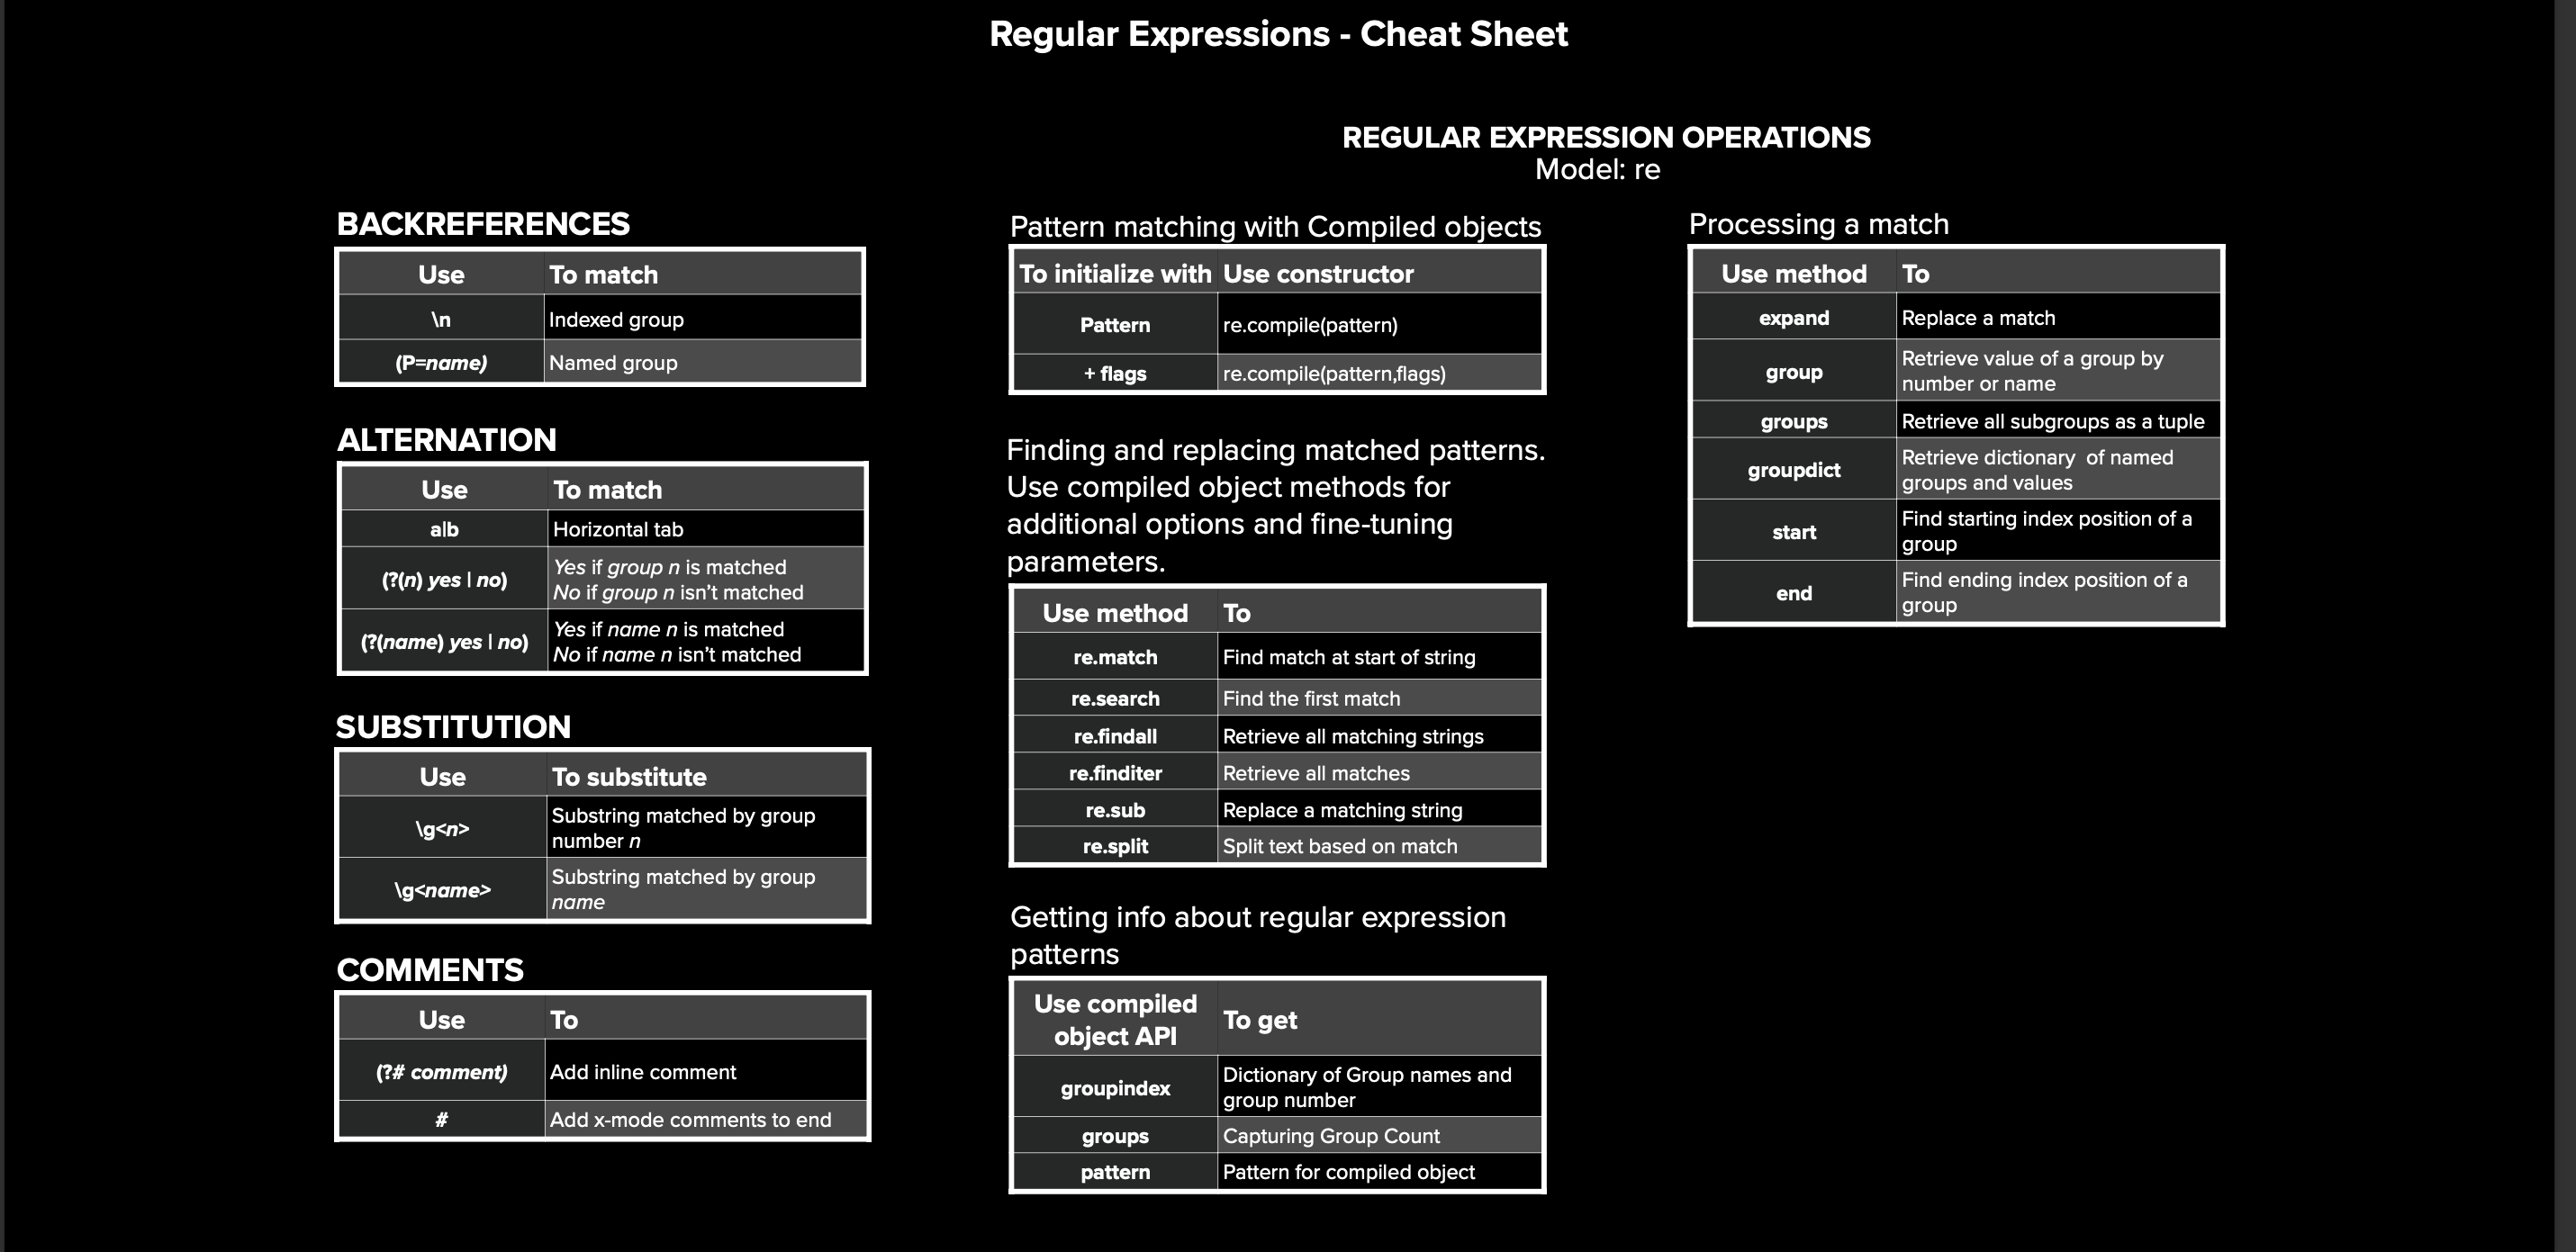

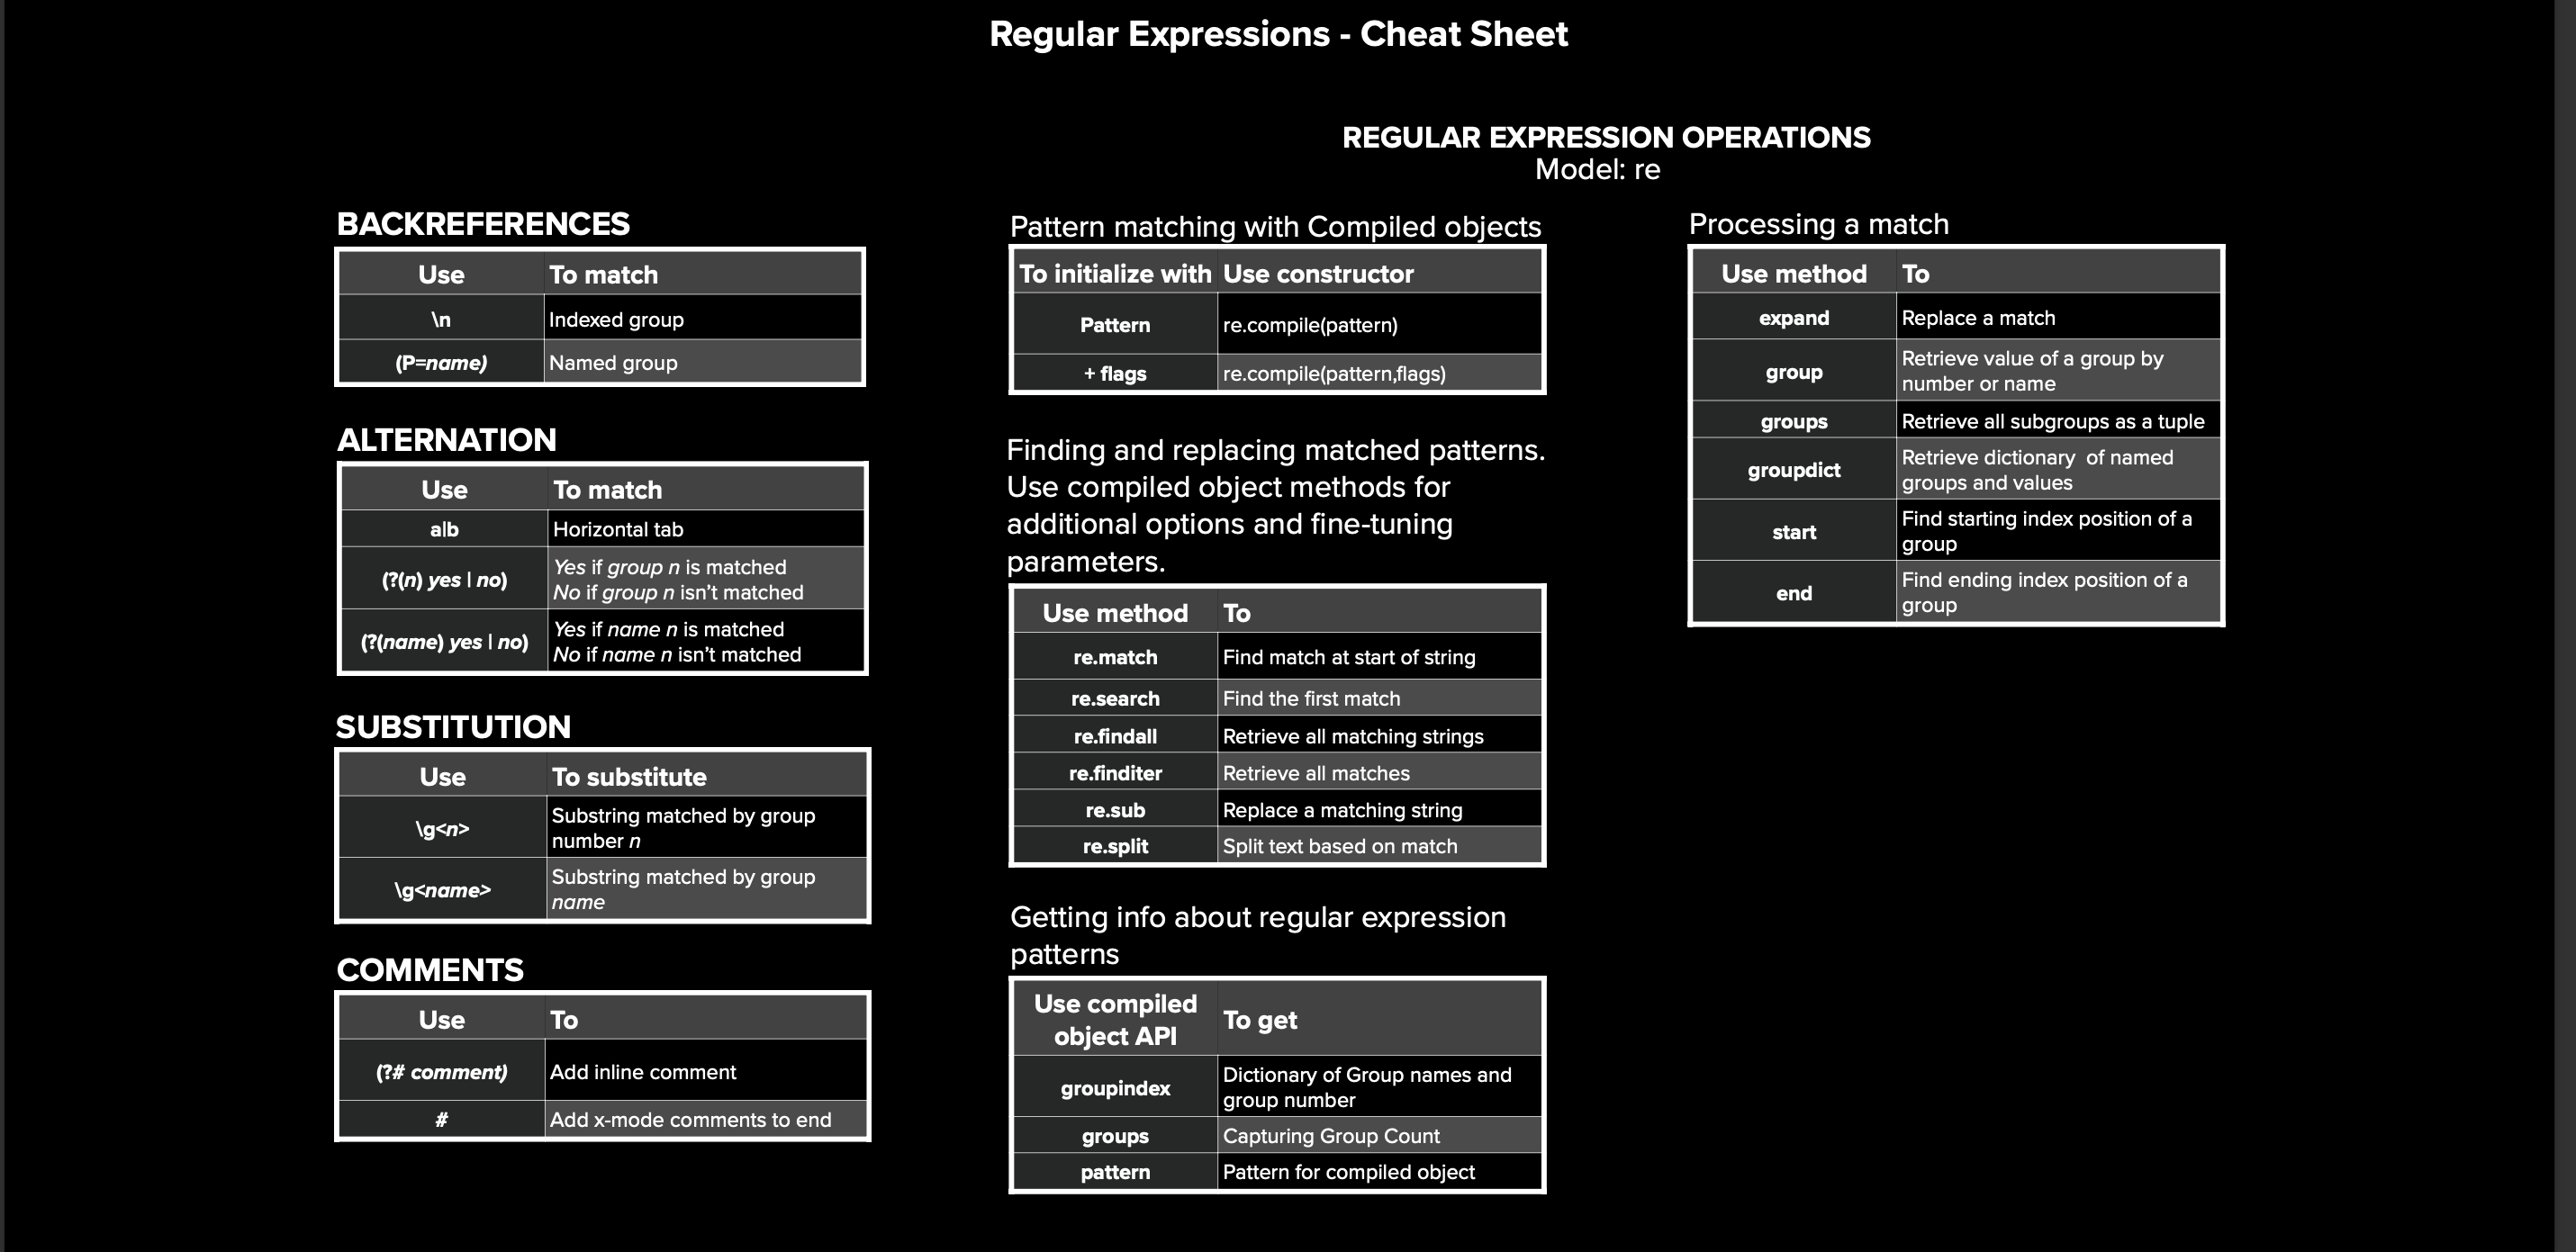

To understand more about regular expression visit the website https://www.emacswiki.org/emacs/RegularExpression 

Below gives you little introduction to regex and some basic operation, syntax, method and functions used in regex for better understanding.

# Introduction to Regular Expression or regex


* **Pattern** - A text pattern of interest expressed in Regular Expression Language <br> Example: `\b\d+\b` matches a word made up of one or more decimal digits.


* **Text** – String in which to look for a match with a given pattern


* **Regex Engine** - Regular Expression Engine that does the actual work


* **Regex Module** – Python module for interacting with Regex Engine.
Module: re


In [114]:
## regex module
import re 

# The raw-string vs. string

In [3]:
string = 'print \new line'
print(string)

print 
ew line


In [111]:
raw_str = r'print \new line'

In [113]:
raw_str

'print \\new line'

# METHODS IN RegEx

`re.match`() - find first match of text

In [6]:
text = r"1523 is the year that Gustav Vasa became the king of Sweden"
text2 = r"The year that Gustav Vasa became the king of Sweden is 1523"

In [8]:
pattern = r'\d+'

In [9]:
match = re.match(pattern, text)

In [10]:
if match:
    print('succesful match')
else:
    print('no match')

succesful match


In [11]:
if match:
    print(f'{match.group(0)} at index: {match.start()}')
else:
    print('no match')

1523 at index: 0


In [12]:
match.group()

'1523'

# `re.search`() - find the first match anywhere in the text

In [16]:
pattern = r"\d+" # one or more digits

text1 = r"1523 is the year that Gustav Vasa became the king of Sweden"
text2 = r"The year that Gustav Vasa became the king of Sweden is 1523"
text3 = r"1523 is the year that Gustav Vasa became the king of Sweden and he died in 1560"

match = re.search(pattern, text3)




if match:
    print(f'{match.group(0)} at index: {match.start()}')
else:
    print('no match')

1523 at index: 0


# Input validation

In [17]:
# let write a function to validate different inputs

In [33]:
def is_integer(text):
    
    #pattern = r"\d+"
    # Pattern 2
    # start of string or line. followed by one or more digits. followed by end of string or line
    # ^ = start of string or line.
    # $ = end of string or line
    
    pattern = r"^\d+$"
    
    match = re.search(pattern, text)
    
    if match:
        return True
    else:
        return False

In [34]:
is_integer("1234")

True

In [35]:
is_integer("abc")

False

In [36]:
# Let us write a function to text how our pattern function works

def test_is_integer():
    pass_list = ["123", "456", "900", "0091"]
    fail_list = ['a123', '124a', '1 2 3', '1\t2', ' 12', '45 ']
    
    for text in pass_list:
        if not is_integer(text):
            print('\tfailed to detect the inter:', text)
            
    for text in fail_list:
        if is_integer(text):
            print('\tIncottectly classified as an integer:', text)
            
    print('test complete')
        

In [37]:
test_is_integer()

test complete


# `re.findall`- find  all the matches

This method returns only after scanning the entire text, which means that it takes a long time to search through long textg

In [38]:
# Find all numbers in the text
pattern = r"\d+"
text = "Lidingö Postal Codes are 18162, 18143, 18157, 18130"
print ('pattern:', pattern)
match = re.findall(pattern,text)

if match:
    print('found matches:', match)
else:
    print('no match')



pattern: \d+
found matches: ['18162', '18143', '18157', '18130']


# `re.findinter`_iterator

Method returns an iterator with the first match and you have controlto ask for more matches

In [41]:
print('pattern:', pattern)

match_iter = re.finditer(pattern, text)

print('matches')
i= 0
for match in match_iter:
    print('\t', match.group(), 'at index:', match.start())
    
    i +=1
    if i > 2:
        break

pattern: \d+
matches
	 18162 at index: 25
	 18143 at index: 32
	 18157 at index: 39


#  `Groups`-- Find sub matches

group 0 refers to the text in a string that matched the pattern
group 1..n onwards refers to the sub-group

In [42]:
# Separate year, month and day
# 1. pattern = r"\d+"
# 2. pattern = r"\d{4}\d{2}\d{2}"
# 3. pattern = r"(\d{4})(\d{2})(\d{2})"


text = "start date: 20220207"

pattern = r"(\d{4})(\d{2})(\d{2})"
 
print("Pattern: ", pattern)

match = re.search(pattern, text)

if match:
    print('Found a match', match.group(0), 'at index:', match.start())
    
    print('Group', match.groups())
    print('Group', match.group(0)) # group 0 is the whole match
    print('Group', match.group(1)) # Ist index starts at index pos 1
    print('Group', match.group(2)) # and onwards
    print('Group', match.group(3)) #

Pattern:  (\d{4})(\d{2})(\d{2})
Found a match 20220207 at index: 12
Group ('2022', '02', '07')
Group 20220207
Group 2022
Group 02
Group 07


In [43]:
for idx, value in enumerate(match.groups()):
    print("\tGroup:", idx+1, value, '\tat index', match.start(idx+1))

	Group: 1 2022 	at index 12
	Group: 2 02 	at index 16
	Group: 3 07 	at index 18


In [47]:
# Separate year, month and day

# By using this synax (?P<name>exp) we can name our groups and store them in dictionaries. This a really neat
# thing to be able to do.

pattern = r"(?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})"
text = "Start Date: 20200920, 20120420"


print("Pattern:", pattern, "\n")

match = re.search(pattern, text)


if match:
    print("Found a match", match.group(), "at index:", match.start())
    print("\t", match.groupdict())
else:
    print("No match")

Pattern: (?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2}) 

Found a match 20200920 at index: 12
	 {'year': '2020', 'month': '09', 'day': '20'}


# `re.sub()`- Find patterns and relplaces it with pattern

In [110]:
# Objective: format date from 19990420 to 04-20-1995

pattern = r"(?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})"

text = "I was born in 19950420 and gustav was born in 19951218 and Nils was born in 19940802"

# substitute  with value s

relacement_pattern = r"\g<month>-\g<day>-\g<year>"

print("original texyt\t", text)
print()


new_text = re.sub(pattern, relacement_pattern, text)

print("new text\t", new_text)

original texyt	 I was born in 19950420 and gustav was born in 19951218 and Nils was born in 19940802

new text	 I was born in 04-20-1995 and gustav was born in 12-18-1995 and Nils was born in 08-02-1994


In [62]:
import datetime

In [63]:
# with the sub method, we can pass a function as the second argument

def format_date(match):
    in_date = match.groupdict()
    
    # we want to mKE all dictionary values into inter format
    
    year = int(in_date["year"])
    month = int(in_date["month"])
    day = int(in_date["day"])
    
    #https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
    # %b = Abbrevation of month in text, %d = day of month exp. as Int, %Y is year in four digits.
    # %B = month in text
    
    return datetime.date(year,month,day).strftime("%d %B %Y")

In [64]:
pattern = r"(?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})"

text = "I was born in 19950420 and <gustav was born in 19951218 and Nils was born in 19940802"

# same pattern and text abov, we only pass a function to the second argument this time

print("original text\t", text)
print()

new_text = re.sub(pattern, format_date, text)

print("new text\t", new_text)

original text	 I was born in 19950420 and <gustav was born in 19951218 and Nils was born in 19940802

new text	 I was born in 20 April 1995 and <gustav was born in 18 December 1995 and Nils was born in 02 August 1994


# `RegEx` Language

single char patterns

In [66]:
# Basics building blocks is that regex matches are literal and case sensitive

text = "The last thing i want to do is to insult you. But is IS on the list"

pattern = r"i"

re.findall(pattern, text)

['i', 'i', 'i', 'i', 'i', 'i']

In [67]:
# Case sensitive
pattern = r"I"

re.findall(pattern, text)

['I']

In [68]:
text = 'Every saint has past, and every sinner has a future'

pattern = r"very"

re.findall(pattern, text)

['very', 'very']

In [69]:
# Pipe char | is used for OR condition
# find all occurences as, f, ry

pattern = r"as|f|ry"

re.findall(pattern, text)

['ry', 'as', 'as', 'ry', 'as', 'f']

In [70]:
pattern = r"[ry]"

re.findall(pattern, text)

['r', 'y', 'r', 'y', 'r', 'r']

In [75]:
text = "I am trapped in a body of bodies"

pattern = r"[Bb]od[yies]*"

re.findall(pattern, text)

['body', 'bodies']

In [74]:
# negating a set

pattern = r"[aieou]"
pattern = r"[^aieou]" # this is negating the set

re.findall(pattern, text)

['I',
 ' ',
 'm',
 ' ',
 't',
 'r',
 'p',
 'p',
 'd',
 ' ',
 'n',
 ' ',
 ' ',
 'b',
 'd',
 'y',
 ' ',
 'f',
 ' ',
 'b',
 'd',
 's']

In [76]:
# We can specify a range of chars

pattern = r"[a-d]"
re.findall(pattern, text)

['a', 'a', 'd', 'a', 'b', 'd', 'b', 'd']

In [78]:
pattern = r"[a-dz-z0-4]"
re.findall(pattern, text)

['a', 'a', 'd', 'a', 'b', 'd', 'b', 'd']

In [80]:
 # negating a range
pattern = r"[^a-dx-z0-4]"
re.findall(pattern, text)

['I',
 ' ',
 'm',
 ' ',
 't',
 'r',
 'p',
 'p',
 'e',
 ' ',
 'i',
 'n',
 ' ',
 ' ',
 'o',
 ' ',
 'o',
 'f',
 ' ',
 'o',
 'i',
 'e',
 's']

In [85]:
# the dot (.) iS A WILDCARD CHARACTER AND MATCHES ALL EXCEPT NEWLINEW \n
text = "You are what you do, not what you say you would do."

pattern = r"."
re.findall(pattern, text)

['Y',
 'o',
 'u',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'w',
 'h',
 'a',
 't',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'd',
 'o',
 ',',
 ' ',
 'n',
 'o',
 't',
 ' ',
 'w',
 'h',
 'a',
 't',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 's',
 'a',
 'y',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'w',
 'o',
 'u',
 'l',
 'd',
 ' ',
 'd',
 'o',
 '.']

In [86]:
# if we want literal match of the dot we use backslash, 
# baclslash gives escape character
pattern = r"\."
re.findall(pattern, text)

['.']

# `Anchors`

In [88]:
# word boundry
# use \b anchor to at word boundaries

text = "There is greenhouse gas in my green house"
pattern = r"\bhouse\b"
re.findall(pattern, text)

['house']

In [92]:
# start of string or new line

text = "text goes on line one \ntext goes here as well"
pattern = r"(?m)^text"
re.findall(pattern, text)

['text', 'text']

#  `Chatacter Classes`


In [98]:
text = "Everything you can imagine is real in 2021-¢.$"


#pattern = r"\w" # Word character. [0-9_a-zA-Z] and Unicode word characters
#pattern = r"\W" # Negation of word char
#pattern = r"\d" # Match digits in all languages
#pattern = r"\D" # match all non-digits
#pattern = r"\s" # match all whitespaces
#pattern = r"\S" # Negation of all whitespaces

match_iter = re.finditer(pattern, text)

print ('Matches')
for match in match_iter:
    print('\t', match.group(0), 'at index:', match.start())

Matches
	 E at index: 0
	 v at index: 1
	 e at index: 2
	 r at index: 3
	 y at index: 4
	 t at index: 5
	 h at index: 6
	 i at index: 7
	 n at index: 8
	 g at index: 9
	 y at index: 11
	 o at index: 12
	 u at index: 13
	 c at index: 15
	 a at index: 16
	 n at index: 17
	 i at index: 19
	 m at index: 20
	 a at index: 21
	 g at index: 22
	 i at index: 23
	 n at index: 24
	 e at index: 25
	 i at index: 27
	 s at index: 28
	 r at index: 30
	 e at index: 31
	 a at index: 32
	 l at index: 33
	 i at index: 35
	 n at index: 36
	 2 at index: 38
	 0 at index: 39
	 2 at index: 40
	 1 at index: 41
	 - at index: 42
	 ¢ at index: 43
	 . at index: 44
	 $ at index: 45


# `Quantifiers`

<a href="https://medium.com/@318097/greedy-lazy-match-in-regular-expression-35ce8eca4060"> Difference between Greedy and Lazy </a>

In [100]:
# There are several regular expression quantifiers which are used to specify how many times a given 
# character can be repeated before matching is done. This is mainly used when the number of characters 
# going to be matched is unknown.

text = "Mc tD Pl"

pattern = r"[A-Z][a-z]"

re.findall(pattern, text)

['Mc', 'Pl']

In [102]:
text = "Gustav and Nils run equally fast G"

pattern = r"[A-Z][a-z]+"

re.findall(pattern, text)

['Gustav', 'Nils']

In [109]:
text = "Bam Baam Baaaaaam Bm"

pattern = r"Ba*?m"
re.findall(pattern, text)

['Bam', 'Baam', 'Baaaaaam', 'Bm']

In [106]:
text = "Bam Baam Baaaaaam Bm"

pattern = r"Ba?m"
re.findall(pattern, text)

['Bam', 'Bm']

In [108]:
text = "12, 123, 1234, 12345, 123456"

pattern = r"\d{2,3}"

re.findall(pattern, text)

['12', '123', '123', '123', '45', '123', '456']